In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("./../dataset/processed.csv")

In [3]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 timestamp                              0
mode                                   0
node_cpu_seconds_total                 0
node_filesystem_avail_bytes            0
node_filesystem_size_bytes             0
node_disk_read_bytes_total             0
node_disk_written_bytes_total          0
node_network_receive_bytes_total       0
node_network_receive_drop_total        0
node_network_receive_errs_total        0
node_network_transmit_packets_total    0
node_vmstat_pgmajfault                 0
node_memory_MemAvailable_bytes         0
node_memory_MemTotal_bytes             0
node_forks_total                       0
node_intr_total                        0
node_load1                             0
node_load5                             0
node_load15                            0
node_sockstat_TCP_alloc                0
node_sockstat_TCP_inuse                0
node_sockstat_TCP_mem                  0
node_sockstat_TCP_mem_bytes            0
node_sockstat_UDP_inuse                0

In [4]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [5]:
print("\nData Types:\n", df.dtypes)


Data Types:
 timestamp                               object
mode                                    object
node_cpu_seconds_total                 float64
node_filesystem_avail_bytes              int64
node_filesystem_size_bytes               int64
node_disk_read_bytes_total               int64
node_disk_written_bytes_total            int64
node_network_receive_bytes_total         int64
node_network_receive_drop_total          int64
node_network_receive_errs_total          int64
node_network_transmit_packets_total      int64
node_vmstat_pgmajfault                   int64
node_memory_MemAvailable_bytes           int64
node_memory_MemTotal_bytes               int64
node_forks_total                         int64
node_intr_total                          int64
node_load1                             float64
node_load5                             float64
node_load15                            float64
node_sockstat_TCP_alloc                  int64
node_sockstat_TCP_inuse                  int64

In [6]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        node_cpu_seconds_total  node_filesystem_avail_bytes  \
count            40430.000000                 4.043000e+04   
mean            307482.459519                 3.122294e+11   
std              67402.910775                 2.744203e+10   
min             190158.040000                 2.856264e+11   
25%             249118.212500                 2.856290e+11   
50%             307488.235000                 3.010588e+11   
75%             365851.107500                 3.500017e+11   
max             424971.170000                 3.500040e+11   

       node_filesystem_size_bytes  node_disk_read_bytes_total  \
count                4.043000e+04                4.043000e+04   
mean                 3.404055e+11                1.795149e+09   
std                  2.766115e+10                1.468109e+08   
min                  3.135153e+11                1.614258e+09   
25%                  3.135153e+11                1.614286e+09   
50%                  3.292481

In [7]:
print("\nClass Distribution:\n", df['mode'].value_counts())


Class Distribution:
 mode
normal_traffic    9479
high_traffic      9414
udp_flood         7215
http_flood        6699
icmp_flood        4632
tcp_flood         2991
Name: count, dtype: int64


In [8]:
mode_mapping = {
    "normal_traffic": 0,
    "icmp_flood": 1,
    "udp_flood": 2,
    "high_traffic": 3,
    "tcp_flood": 4,
    "http_flood": 5,
}
df["mode"] = df["mode"].map(mode_mapping)

In [9]:
# Ensure missing values are handled
if pd.isnull(df).sum().sum() > 0:
    print("Missing values detected! Filling missing values with column mean...")
    df.fillna(df.mean(), inplace=True)

In [10]:
X = df.drop(columns=["mode"])  # Features
y = df["mode"]  # Target

In [11]:
# Handle timestamp
X["timestamp"] = pd.to_datetime(X["timestamp"])
X["hour"] = X["timestamp"].dt.hour
X["minute"] = X["timestamp"].dt.minute
X["second"] = X["timestamp"].dt.second
X = X.drop(columns=["timestamp"])

In [12]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Reshape for LSTM/GRU (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

In [14]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Define LSTM model
def build_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model




In [16]:
# Define GRU model
def build_gru_model(input_shape, num_classes):
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        GRU(32),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

c:\Users\Asher Siddique\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM model...
Epoch 1/100
1011/1011 - 9s - 9ms/step - accuracy: 0.4413 - loss: 1.3473 - val_accuracy: 0.5749 - val_loss: 1.0333
Epoch 2/100
1011/1011 - 3s - 3ms/step - accuracy: 0.5753 - loss: 1.0163 - val_accuracy: 0.7005 - val_loss: 0.7658
Epoch 3/100
1011/1011 - 3s - 3ms/step - accuracy: 0.6400 - loss: 0.8498 - val_accuracy: 0.7446 - val_loss: 0.6276
Epoch 4/100
1011/1011 - 3s - 3ms/step - accuracy: 0.6823 - loss: 0.7487 - val_accuracy: 0.7936 - val_loss: 0.5306
Epoch 5/100
1011/1011 - 3s - 3ms/step - accuracy: 0.7093 - loss: 0.6746 - val_accuracy: 0.8074 - val_loss: 0.4714
Epoch 6/100
1011/1011 - 3s - 3ms/step - accuracy: 0.7309 - loss: 0.6199 - val_accuracy: 0.8405 - val_loss: 0.4161
Epoch 7/100
1011/1011 - 3s - 3ms/step - accuracy: 0.7470 - loss: 0.5818 - val_accuracy: 0.8411 - val_loss: 0.3809
Epoch 8/100
1011/1011 - 3s - 3ms/step - accuracy: 0.7624 - loss: 0.5495 - val_accuracy: 0.8656 - val_loss: 0.3486
Epoch 9/100
1011/1011 - 3s - 3ms/step - accuracy: 0.7746 - loss: 

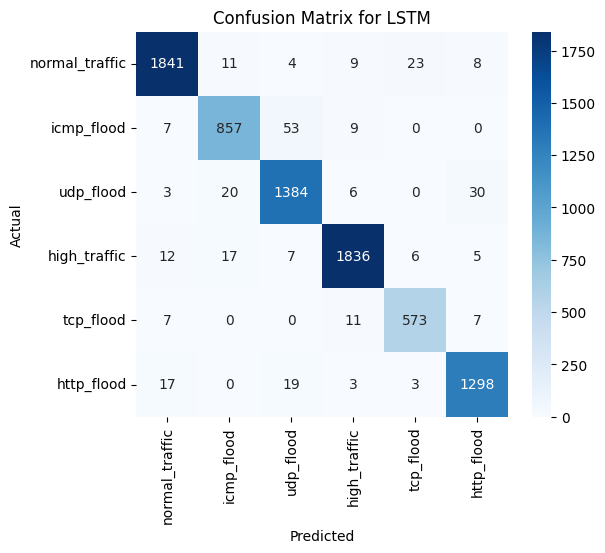

Training GRU model...
Epoch 1/100
1011/1011 - 8s - 8ms/step - accuracy: 0.4238 - loss: 1.3889 - val_accuracy: 0.6003 - val_loss: 1.0306
Epoch 2/100
1011/1011 - 4s - 4ms/step - accuracy: 0.5568 - loss: 1.0269 - val_accuracy: 0.6759 - val_loss: 0.7894
Epoch 3/100
1011/1011 - 3s - 3ms/step - accuracy: 0.6142 - loss: 0.8745 - val_accuracy: 0.7350 - val_loss: 0.6504
Epoch 4/100
1011/1011 - 3s - 3ms/step - accuracy: 0.6496 - loss: 0.7894 - val_accuracy: 0.7592 - val_loss: 0.5709
Epoch 5/100
1011/1011 - 2s - 2ms/step - accuracy: 0.6780 - loss: 0.7309 - val_accuracy: 0.7978 - val_loss: 0.5126
Epoch 6/100
1011/1011 - 3s - 3ms/step - accuracy: 0.7065 - loss: 0.6733 - val_accuracy: 0.8113 - val_loss: 0.4609
Epoch 7/100
1011/1011 - 3s - 3ms/step - accuracy: 0.7182 - loss: 0.6428 - val_accuracy: 0.8366 - val_loss: 0.4288
Epoch 8/100
1011/1011 - 3s - 3ms/step - accuracy: 0.7351 - loss: 0.6107 - val_accuracy: 0.8558 - val_loss: 0.3958
Epoch 9/100
1011/1011 - 3s - 3ms/step - accuracy: 0.7470 - loss: 0

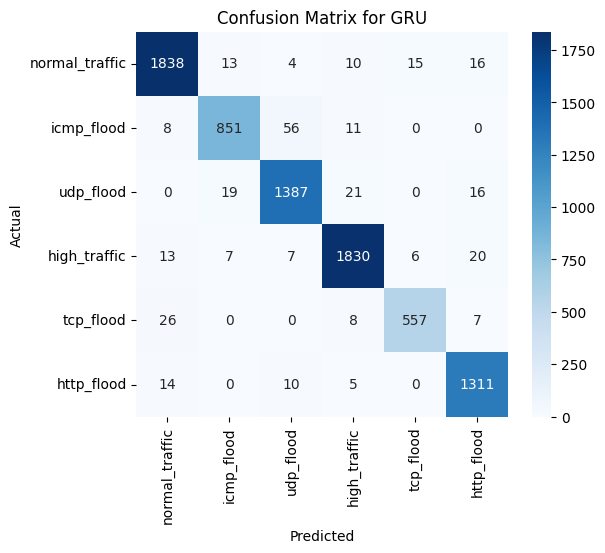

In [17]:
# Train and evaluate models
models = {"LSTM": build_lstm_model((1, X_scaled.shape[2]), len(mode_mapping)),
          "GRU": build_gru_model((1, X_scaled.shape[2]), len(mode_mapping))}

history = {}
for name, model in models.items():
    print(f"Training {name} model...")
    history[name] = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=mode_mapping.keys(), yticklabels=mode_mapping.keys())
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


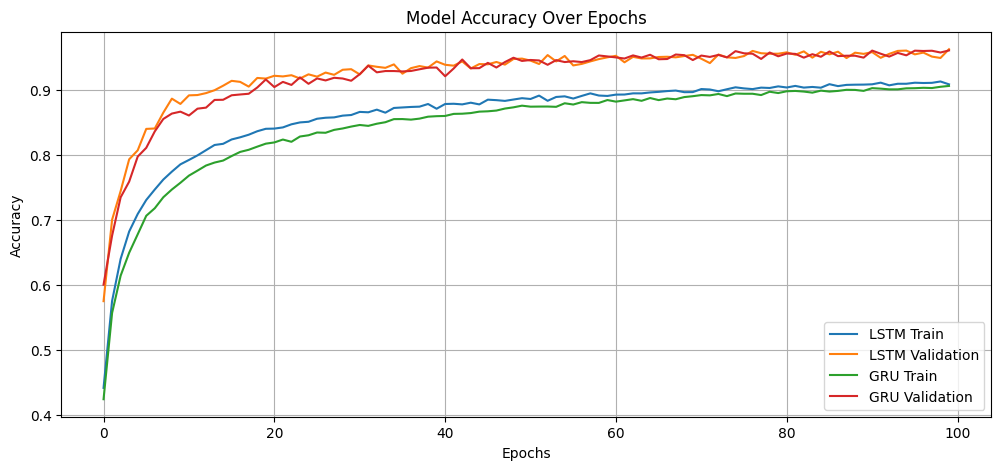

In [18]:
# Plot training history
plt.figure(figsize=(12, 5))
for name, hist in history.items():
    plt.plot(hist.history['accuracy'], label=f'{name} Train')
    plt.plot(hist.history['val_accuracy'], label=f'{name} Validation')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()
